In [133]:
from zipfile import ZipFile as zp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
dz = zp("/content/cancer.zip")
data = pd.read_csv(dz.open("Cancer_Data.csv"))
data_copy = data.copy()

data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
#Transform object values
data['diagnosis'] = [1 if i == "M" else 0 for i in data['diagnosis']]
print(data['diagnosis'].unique())

[1 0]


1 = M (cancerous)
0 = B (non-cancerous)

In [37]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [38]:
data.drop(columns = ["id", "Unnamed: 32"], axis = 1, inplace = True)
print(len(data.columns))

31


In [39]:
data.duplicated().sum()

0

In [40]:
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [41]:
data.diagnosis.value_counts()

,count
diagnosis,
0,357
1,212


In [42]:
#Normalize it
data.diagnosis.value_counts(normalize = True)

,proportion
diagnosis,
0,0.627417
1,0.372583


<Axes: xlabel='diagnosis'>

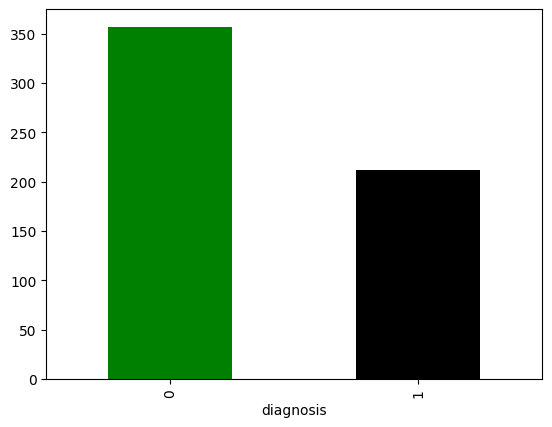

In [43]:
#Visualize it
data.diagnosis.value_counts().plot.bar(color = ['green', 'black'])

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

<ipython-input-44-1860e2dba01a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data_sort, orient ='h', palette = "coolwarm")


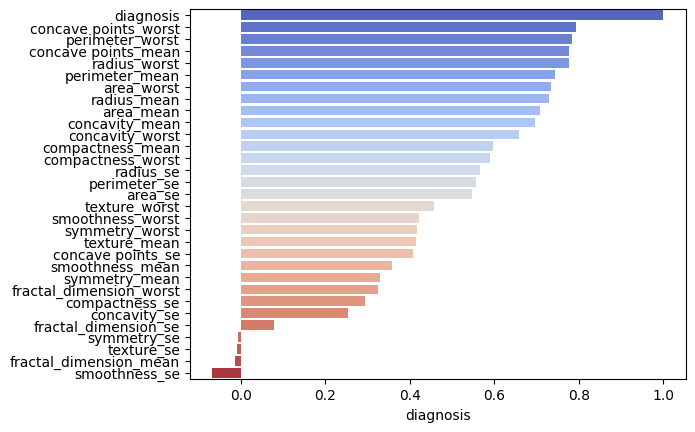

In [44]:
print(data.corr()['diagnosis'].sort_values(ascending = False))

#visualize it
data_sort = data.corr()['diagnosis'].sort_values(ascending = False)
sns.barplot(data_sort, orient ='h', palette = "coolwarm")
plt.show()

In [56]:
#threshold value is 0.75

corr_matrix = data.corr().sort_values(by = 'diagnosis',ascending = False)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.7
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

data.drop(columns = to_drop, inplace = True)

data.corr()['diagnosis'].sort_values(ascending = False).abs()

,diagnosis
diagnosis,1.000000
texture_mean,0.415185
concave points_se,0.408042
smoothness_mean,0.358560
symmetry_mean,0.330499
concavity_se,0.253730
fractal_dimension_se,0.077972
symmetry_se,0.006522
texture_se,0.008303
fractal_dimension_mean,0.012838


this result says that it reduces the risk of multicollinearity, which can negatively affect regression-based models.

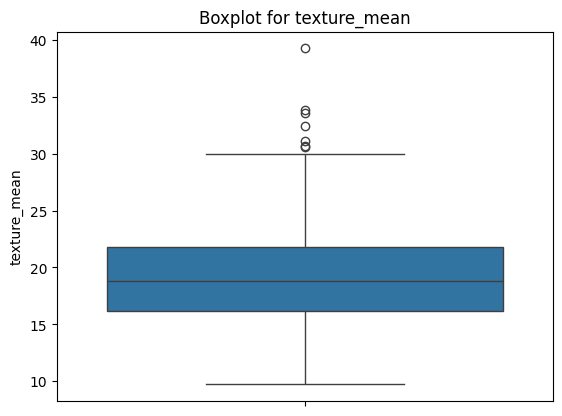

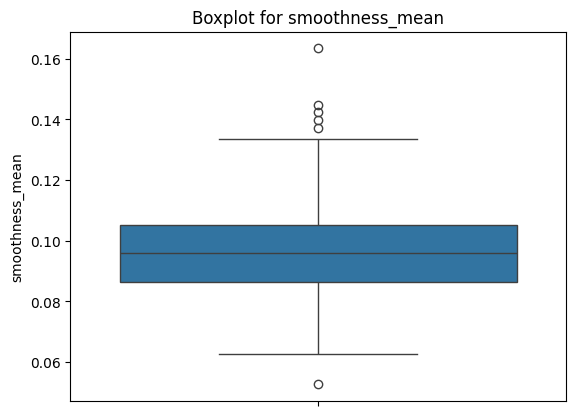

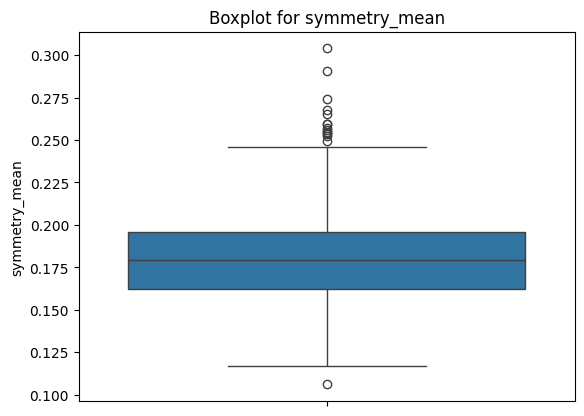

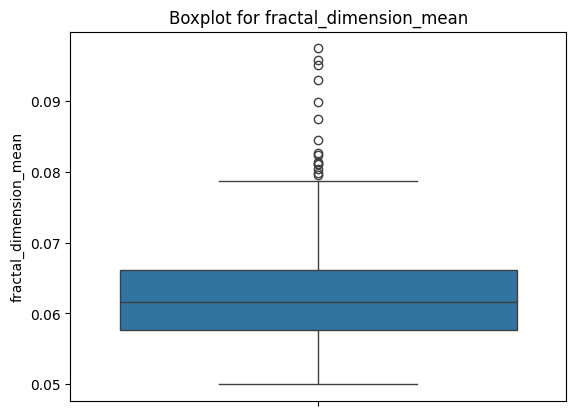

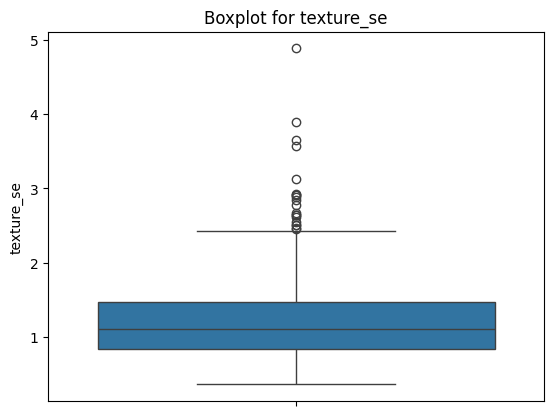

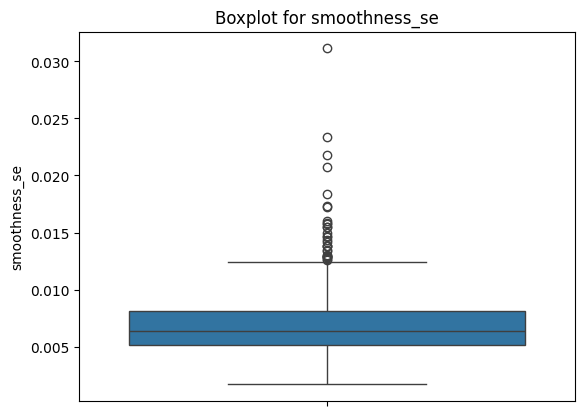

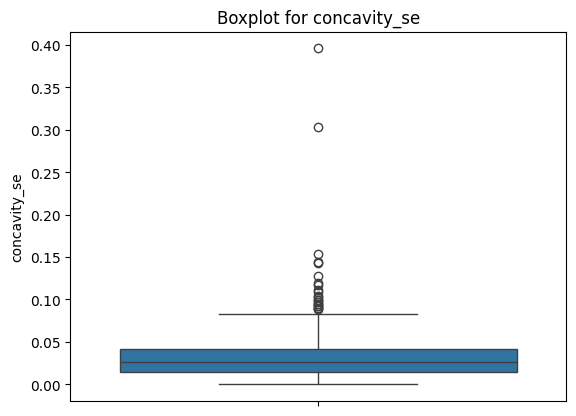

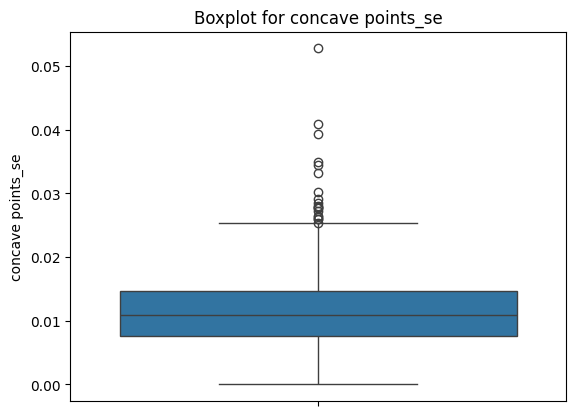

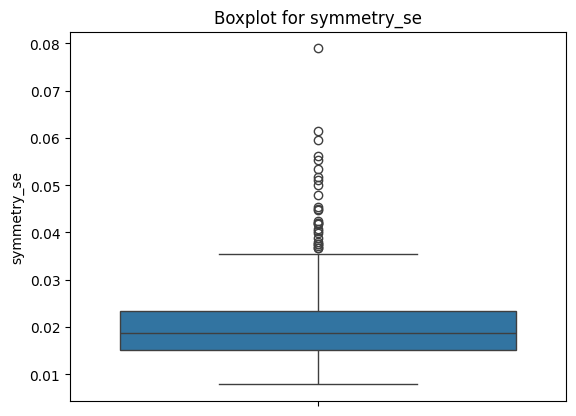

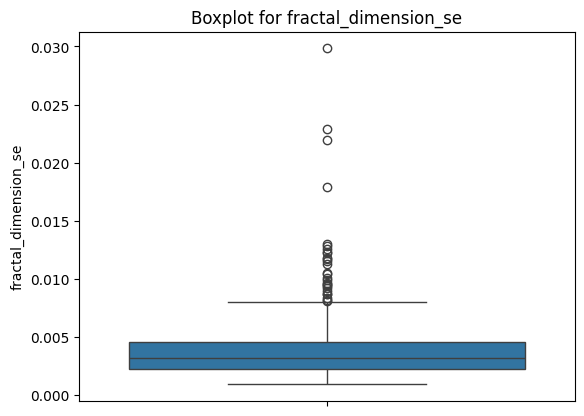

In [61]:
#boxplot
for i in data.columns[1:]:
  sns.boxplot(data[i])
  plt.title(f"Boxplot for {i}")
  plt.show()

In [65]:
def iqr_outliers(data, column):
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3 - q1
  lower_bond = q1 - (1.5 * iqr)
  upper_bond = q3 + (1.5 * iqr)
  data[column] = data[column].clip(lower_bond, upper_bond)
  return data

for j in data.columns:
  data = iqr_outliers(data, j)
  print(data)

     diagnosis  texture_mean  smoothness_mean  symmetry_mean  \
0            1         10.38          0.11840         0.2419   
1            1         17.77          0.08474         0.1812   
2            1         21.25          0.10960         0.2069   
3            1         20.38          0.14250         0.2597   
4            1         14.34          0.10030         0.1809   
..         ...           ...              ...            ...   
564          1         22.39          0.11100         0.1726   
565          1         28.25          0.09780         0.1752   
566          1         28.08          0.08455         0.1590   
567          1         29.33          0.11780         0.2397   
568          0         24.54          0.05263         0.1587   

     fractal_dimension_mean  texture_se  smoothness_se  concavity_se  \
0                   0.07871      0.9053       0.006399       0.05373   
1                   0.05667      0.7339       0.005225       0.01860   
2              

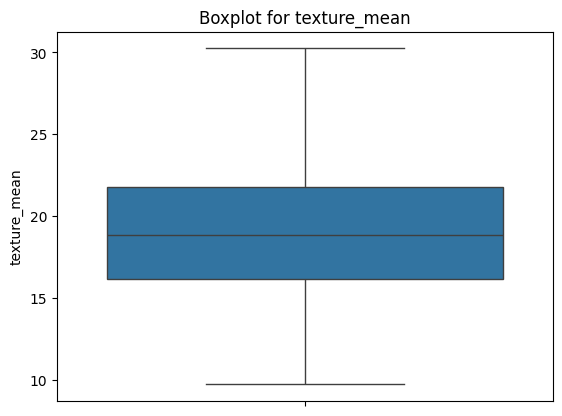

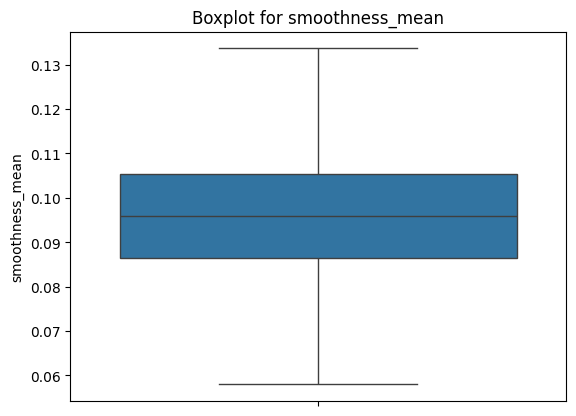

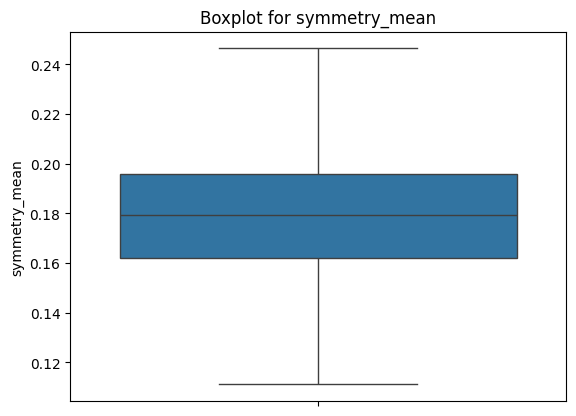

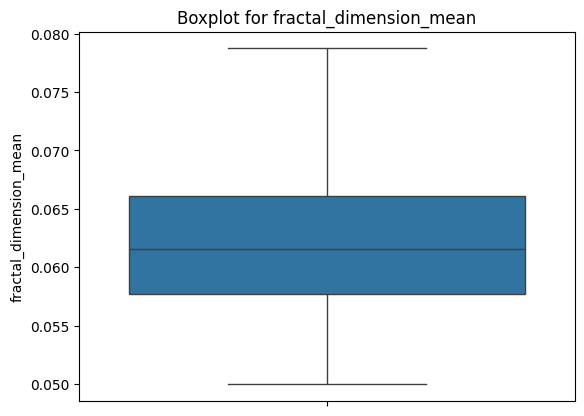

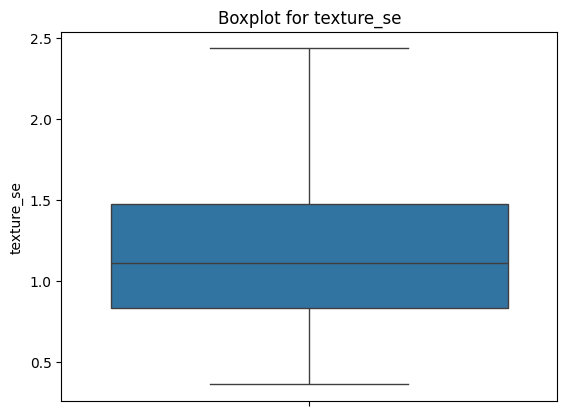

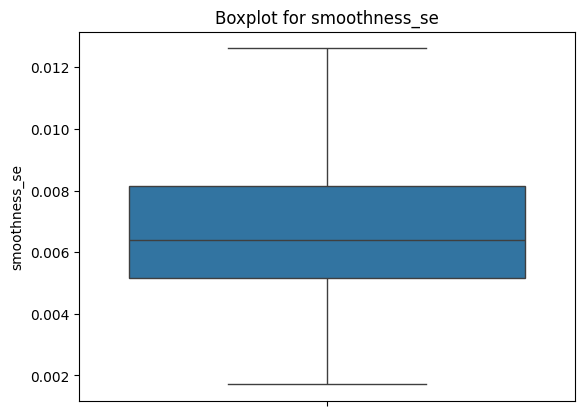

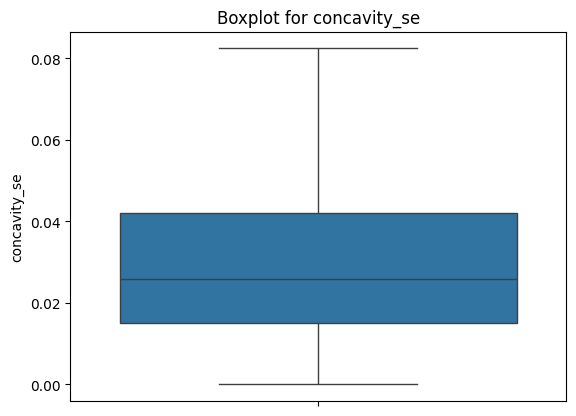

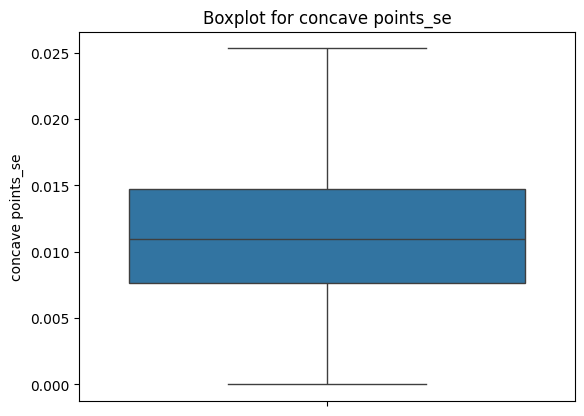

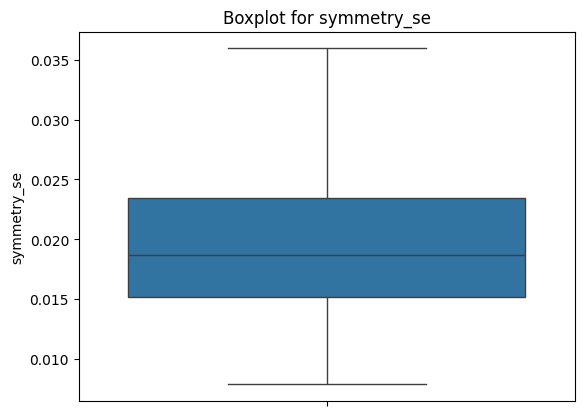

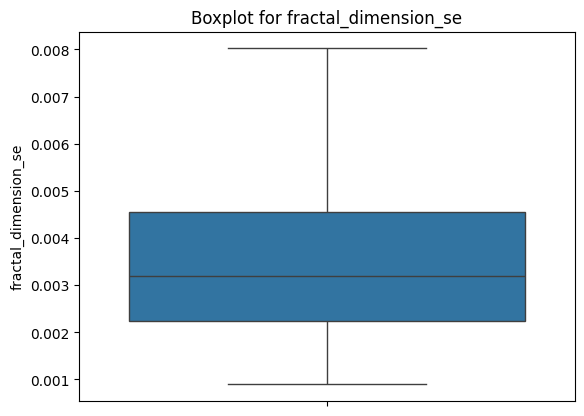

In [66]:
#Outlier checking after IQR
for i in data.columns[1:]:
  sns.boxplot(data[i])
  plt.title(f"Boxplot for {i}")
  plt.show()

as we can see, we solve it.

In [127]:
#Standardize

sc = StandardScaler()
x = sc.fit_transform(x)

In [128]:
#Spliting data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [69]:
#knn model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

Accuracy score: 96.49
Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



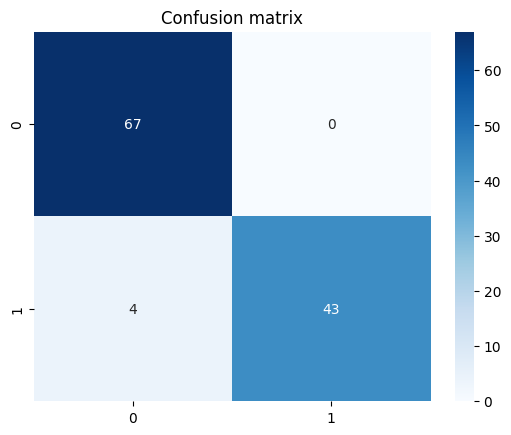

In [129]:
acs = accuracy_score(y_test, knn_pred)
print(f"Accuracy score: {round((acs * 100), 2)}")

cr = classification_report(y_test, knn_pred)
print("Classification report:\n", cr)

cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.title("Confusion matrix")
plt.show()

In [130]:
#Hyperparamater tuning for KNN

max_k = 20
acs = [ ]

for k in range(3, max_k + 1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn = knn.fit(x_train, y_train.values.ravel())
  knn_preds = knn.predict(x_test)

  # Evaluate the model with accuracy score
  accuracy = accuracy_score(y_test, knn_preds)
  acs.append((k, round(accuracy * 100, 2)))

results = pd.DataFrame(acs, columns=['K', 'Accuracy Score'])

# plt.plot(results['K'], results['Accuracy Score'], color = 'g')
# plt.xlabel("K")
# plt.ylabel("Accuracy")
# plt.show()

results.set_index('K', inplace = True)
results

,Accuracy Score
K,
3,95.61
4,95.61
5,95.61
6,95.61
7,94.74
8,94.74
9,94.74
10,94.74
11,95.61


when k = 12, 16, 17 result is greater than others

In [92]:
print(np.max(results['Accuracy Score']))

96.49


In [131]:
#knn model after tuning

knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

Accuracy score: 96.49
Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



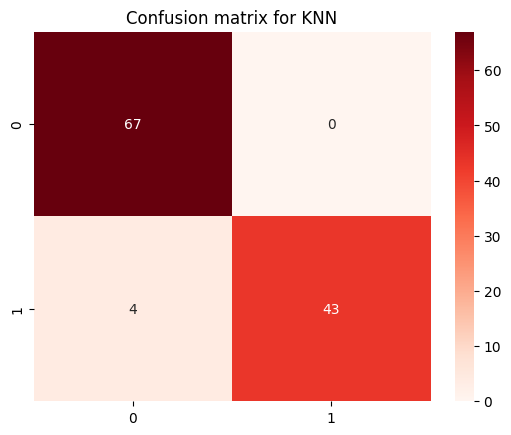

In [132]:
#Metrics after tuning

acs = accuracy_score(y_test, knn_pred)
print(f"Accuracy score: {round((acs * 100), 2)}")

cr = classification_report(y_test, knn_pred)
print("Classification report:\n", cr)

cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title("Confusion matrix for KNN")
plt.show()

Our KNN model work with 96.49% accuracy

In [116]:
#SVM model
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

Accuracy score: 97.37
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



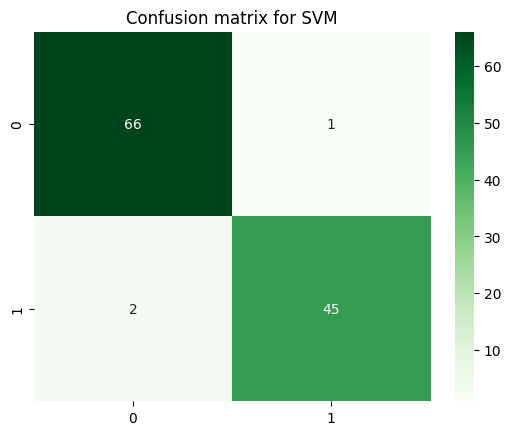

In [117]:
#Metrics for SVM

acs_svm = accuracy_score(y_test, svm_pred)
print(f"Accuracy score: {round((acs_svm * 100), 2)}")

cr_svm = classification_report(y_test, svm_pred)
print("Classification report:\n", cr_svm)

cm_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm_svm, annot = True, cmap = 'Greens')
plt.title("Confusion matrix for SVM")
plt.show()

In [134]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [1, 2, 3, 4, 5, 10, 20],
    'gamma': ['scale', 'auto'],
    'kernel': ['poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(estimator = svm, param_grid = params,verbose = 1,\
                    scoring ="accuracy",n_jobs = -1, cv = 10)
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [119]:
#SVM model after tuning
from sklearn.svm import SVC

svm = SVC(C = 2, kernel = 'rbf', gamma = 'scale')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

Accuracy score: 98.25
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



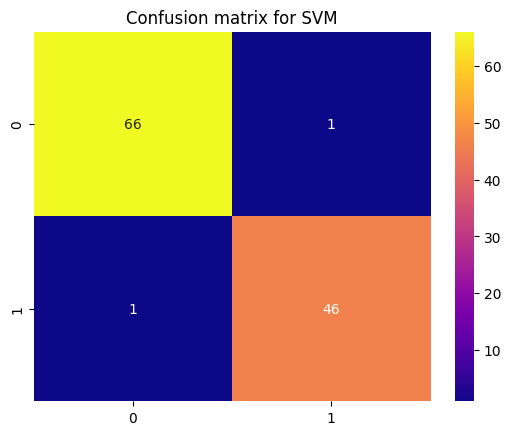

In [120]:
#Metrics for SVM after Hyperparameter tuning

acs_svm = accuracy_score(y_test, svm_pred)
print(f"Accuracy score: {round((acs_svm * 100), 2)}")

cr_svm = classification_report(y_test, svm_pred)
print("Classification report:\n", cr_svm)

cm_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm_svm, annot = True, cmap = 'plasma')
plt.title("Confusion matrix for SVM")
plt.show()

SVM works with 98.25% accuracy. Thus, SVM is better than KNN for us.